In [1]:
#imports 
from pymatgen import Structure
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from jupyter_jsmol import JsmolView
from IPython.display import display
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure import bandstructure as bs

In [2]:
#Téléchargement structure de bande du matériau 
with MPRester("4cITfHbiVnRj5dfqR") as m:    
    struct_band = m.get_bandstructure_by_material_id("mp-4636")

In [3]:
#Données utiles    
pltr = plotter.BSPlotter(struct_band)
data = pltr.bs_plot_data()
dist = data.get('ticks').get('distance')
energy = data.get('energy')

L'énergie de la bande interdite est de 2.2219 eV
La transition de la bande interdite est : L-L 
La bande interdite est-elle directe ? Réponse : True
Diagramme de la structure de bande :


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

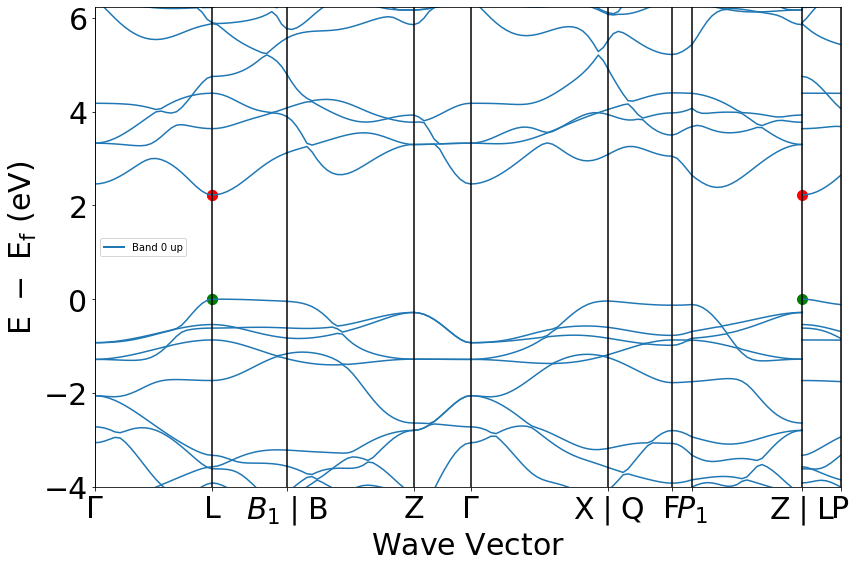

In [4]:
#Détermination bande interdite
bande_interdite = struct_band.get_band_gap()
#Print des paramètres de la bande interdite 
print("L'énergie de la bande interdite est de {} eV".format(bande_interdite['energy']))
print("La transition de la bande interdite est : {} ".format(bande_interdite['transition']))
print("La bande interdite est-elle directe ? Réponse : {}".format(bande_interdite['direct']))
#Print du diagramme de la structure de bande
print("Diagramme de la structure de bande :")
pltr.get_plot(vbm_cbm_marker = True)

In [5]:
#Direction dans laquelle la dernière bande de valence présente le plus et le moins de dispersion

La plus grande pente de la dernière bande de valence a une valeur de 1.1755775535859148
La direction dans laquelle la dernière bande de valence a le plus de dispersion est donc Γ/L: 
La plus petite pente de la dernière bande de valence a une valeur de 0.06352366494234259
La direction dans laquelle la dernière bande de valence a le moins de dispersion est donc : F/P1
Diagramme avec les flêches indiquant les directions de dispersion maximale et minimale de la dernière bande de valence :
En bleu, la direction de dispersion maximale et en rouge la direction de dispersion minimale


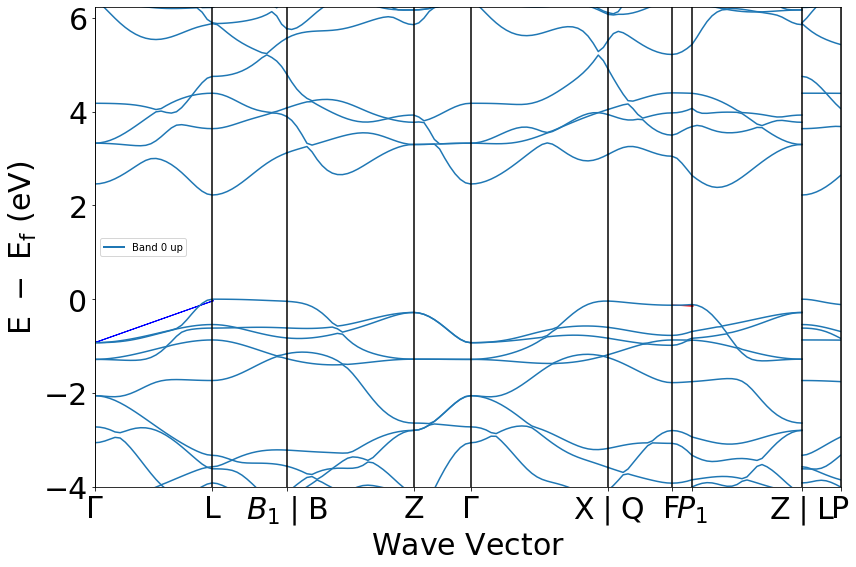

In [6]:
#Indice de la dernière bande de valence
ind_bv = list(struct_band.get_vbm()['band_index'].values())[0] #résultat = 19 mais je ne le print pas pour la version finale du notebook, question de propreté
#Pour commencer, calcul de la distance entre 2 branches différentes
dst = []
for i in range (len(dist)-1):
    d = dist[i+1]-dist[i]
    if d != 0:
        dst.append(d)
#Ensuite, calcul de la différence d'énergie entre 2 branches différentes de la dernière bande de valence
diff_energie = []
for j in range(len(dst)):
    diff_energie.append((energy.get('1')[j][19][0])-(energy.get('1')[j][19][-1])) #19 est l'indice de la dernière bande valence calculé juste au-dessus
#Enfin, calcul de la pente entre 2 branches différentes de la dernière bande de valence
pente = []
for k in range(len(dst)):
    pente.append(diff_energie[k]/dst[k])
#Calcul des pentes en valeur absolue pour déterminer la plus grande et plus petite pente
pente_valabs = []
for l in range(len(pente)):
    pente_valabs.append(abs(pente[l]))
#Détermination de la valeur des plus grande et plus petite pentes en valeur absolue
pente_max = max(pente_valabs)
pente_min = min(pente_valabs)
#Déterlination de la valeur des plus grande et plus petite pentes
ind_max = pente_valabs.index(pente_max)
ind_min = pente_valabs.index(pente_min)
valeur_pente_max = pente[ind_max]
valeur_pente_min = pente[ind_min]
#Print des résultats
print("La plus grande pente de la dernière bande de valence a une valeur de {}".format(valeur_pente_max))
print("La direction dans laquelle la dernière bande de valence a le plus de dispersion est donc Γ/L: ")
print("La plus petite pente de la dernière bande de valence a une valeur de {}".format(valeur_pente_min))
print("La direction dans laquelle la dernière bande de valence a le moins de dispersion est donc : F/P1")
#Print du diagramme avec les flêches indiquant les directions de dispersion maximale et minimale de la dernière bande de valence
print("Diagramme avec les flêches indiquant les directions de dispersion maximale et minimale de la dernière bande de valence :")
print("En bleu, la direction de dispersion maximale et en rouge la direction de dispersion minimale")
pltr.get_plot()
max_disp = plt.arrow(dist[0], (energy.get('1')[0][19])[0], dst[0], -(diff_energie[4]), head_width = 0.01, color = 'b')
min_disp = plt.arrow(dist[10], (energy.get('1')[6][19])[0], dst[6], diff_energie[6], head_width = 0.01, color = 'r')

In [7]:
#Direction dans laquelle la première bande de conduction présente le plus et le moins de dispersion

La plus grande pente de la première bande de conduction a une valeur de 2.13434536059872
La direction dans laquelle la première bande de conduction a le plus de dispersion est donc : L/B1|B
La plus petite pente de la première bande de conduction a une valeur de 0.07053115049015339
La direction dans laquelle la première bande de conduction a le moins de dispersion est donc : X|Q/F
Diagramme avec les flêches indiquant les directions de dispersion maximale et minimale de la première bande de conduction :
En bleu, la direction de dispersion maximale et en rouge la direction de dispersion minimale


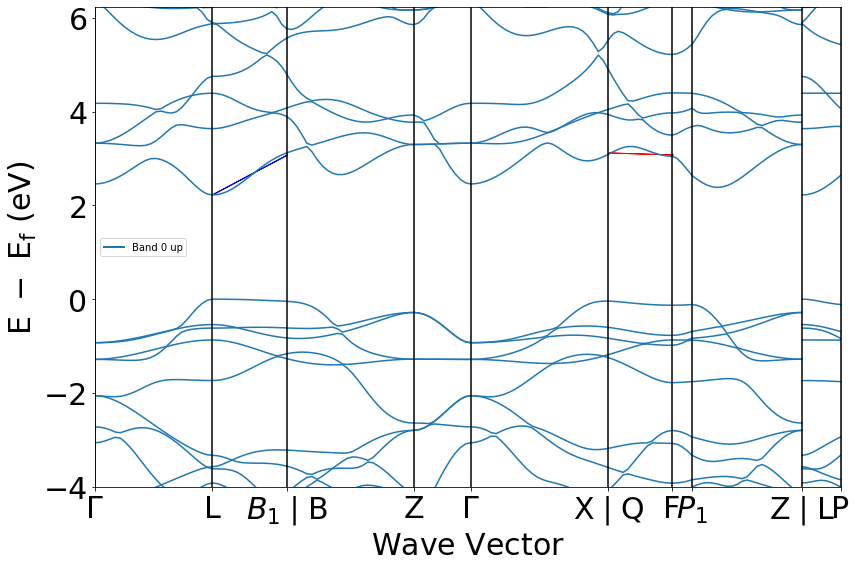

In [8]:
#Indice de la première bande de conduction
ind_bc = list(struct_band.get_cbm()['band_index'].values())[0] #résultat = 20 mais je ne le print pas pour la version finale du notebook, question de propreté
#Pour commencer, calcul de la distance entre 2 branches différentes
dst = []
for i in range (len(dist)-1):
    d = dist[i+1]-dist[i]
    if d != 0:
        dst.append(d)
#Ensuite, calcul de la différence d'énergie entre 2 branches différentes de la première bande de conduction
diff_energie = []
for j in range(len(dst)):
    diff_energie.append((energy.get('1')[j][20][0])-(energy.get('1')[j][20][-1])) #20 est l'indice de la dernière bande valence calculé juste au-dessus    
#Enfin, calcul de la pente entre 2 branches différentes de la dernière bande de valence
pente = []
for k in range(len(dst)):
    pente.append(diff_energie[k]/dst[k])
#Calcul des pentes en valeur absolue pour déterminer la plus grande et plus petite pente
pente_valabs = []
for l in range(len(pente)):
    pente_valabs.append(abs(pente[l]))
#Détermination de la valeur des plus grande et plus petite pentes en valeur absolue
pente_max = max(pente_valabs)
pente_min = min(pente_valabs)
#Déterlination de la valeur des plus grande et plus petite pentes
ind_max = pente_valabs.index(pente_max)
ind_min = pente_valabs.index(pente_min)
valeur_pente_max = pente[ind_max]
valeur_pente_min = pente[ind_min]
#Print des résultats
print("La plus grande pente de la première bande de conduction a une valeur de {}".format(valeur_pente_max))
print("La direction dans laquelle la première bande de conduction a le plus de dispersion est donc : L/B1|B")
print("La plus petite pente de la première bande de conduction a une valeur de {}".format(valeur_pente_min))
print("La direction dans laquelle la première bande de conduction a le moins de dispersion est donc : X|Q/F")
#Print du diagramme avec les flêches indiquant les directions de dispersion maximale et minimale de la première bande de conduction
print("Diagramme avec les flêches indiquant les directions de dispersion maximale et minimale de la première bande de conduction :")
print("En bleu, la direction de dispersion maximale et en rouge la direction de dispersion minimale")
pltr.get_plot()
max_disp = plt.arrow(dist[1], (energy.get('1')[8][20])[0], dst[1], diff_energie[3], head_width = 0.01, color = 'b')
min_disp = plt.arrow(dist[8], (energy.get('1')[2][20])[0], dst[5], -(diff_energie[5]), head_width = 0.01, color = 'r')

In [9]:
#Calcul des masses effectives 

Pour rappel : 
Expression de la masse effective : $m^{*} =  \hbar^{2}(\frac{\partial^2 E}{\partial k^2})^{-1} $
Avec, vu l'hypothèse d'une dispersion parabolique, $E(k) = ak^{2} + bk + c$

In [10]:
#Masse effective au sommet de la dernière bande de valence
h = 6.58212e-16
vbm = struct_band.get_vbm()
e_v = vbm['energy']
k_v = vbm['kpoint'].cart_coords
m_v = (h**2)/(2*e_v)*(k_v[0]**2+k_v[1]**2+k_v[2]**2)
print("La masse effective au sommet de la dernière bande de valence en supposant une dispersion parabolique est de {} kg".format(m_v))

La masse effective au sommet de la dernière bande de valence en supposant une dispersion parabolique est de 8.157521838476784e-32 kg


In [11]:
#Masse effective à la base de la première bande de conduction
h = 6.58212e-16
cbm = struct_band.get_cbm()
e_c = vbm['energy']
k_c = vbm['kpoint'].cart_coords
m_c = (h**2)/(2*e_c)*(k_c[0]**2+k_c[1]**2+k_c[2]**2)
print("La masse effective à la base de la première bande de conduction en supposant une dispersion parabolique est de {} kg".format(m_c))

La masse effective à la base de la première bande de conduction en supposant une dispersion parabolique est de 8.157521838476784e-32 kg
